# Homework 4

### Problem 0: Make fake data

In [53]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (15,10)

In [54]:
t = np.linspace(0,np.pi*100,np.int(1e5))
N=10+np.sin(t)
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

### Problem 1: Subsets of Data

The idea here is to plot small portions of the data. In python this is often called array slicing, but in other languages it has no special terminology. Your goal is to figure out how to make the following plots

##### 1a) Make a scatter plot of the first 1000 data points

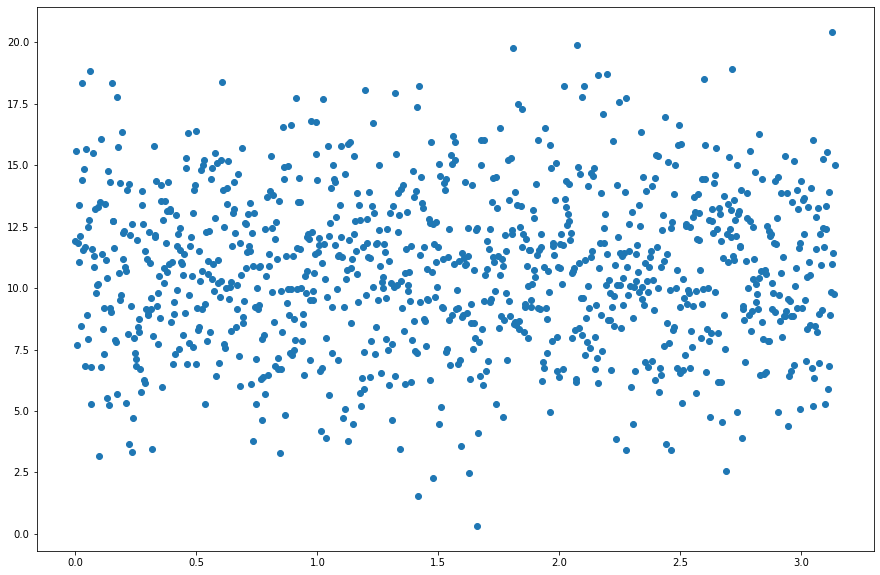

In [55]:
dist = bkgd[0:1000]

fig, (plt1) = plt.subplots(1,1)
plt1.scatter(t[0:1000],dist)

plt.show()

##### 1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array.

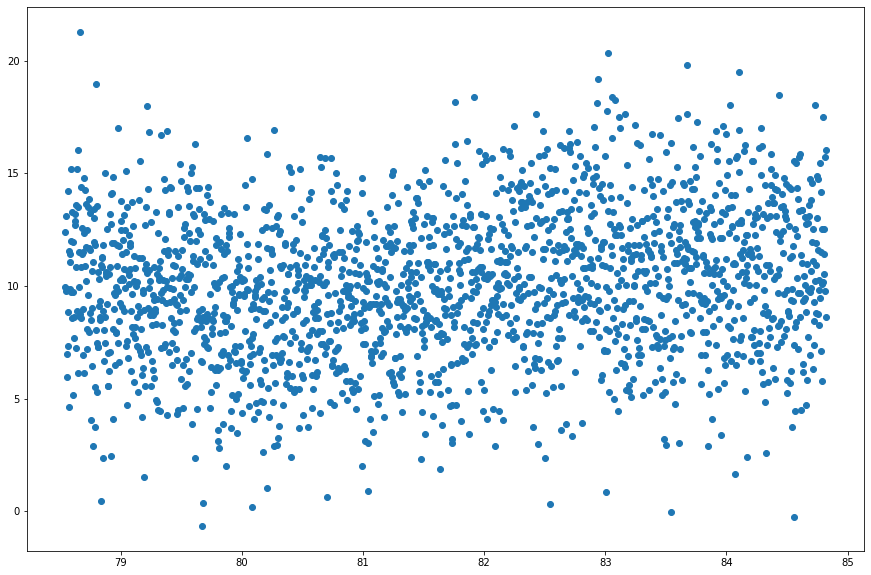

In [59]:
def slicePlot(start,size,step=1):
    plt.plot(t[start:start+size:step],bkgd[start:start+size:step],'o')
    plt.show()

slicePlot(25000,2000)

##### 1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

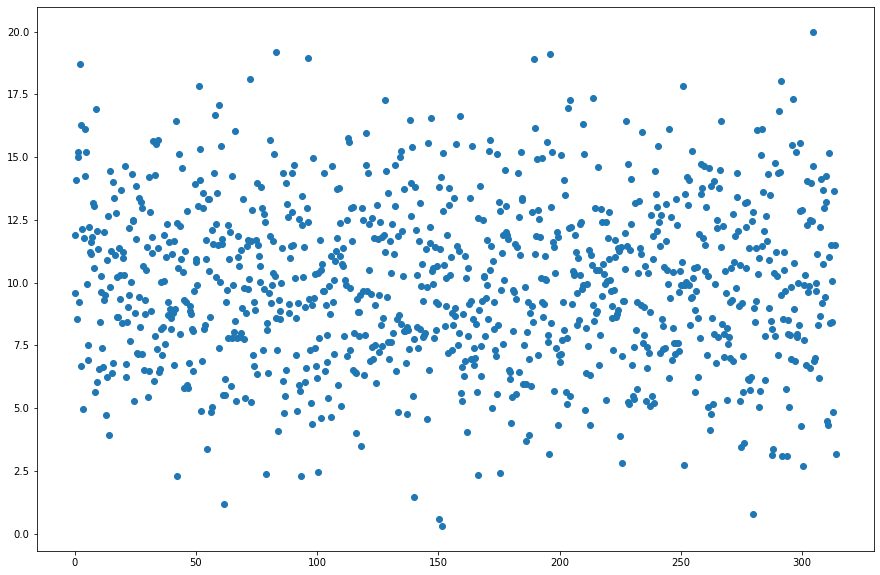

In [60]:
slicePlot(0,np.int(1e5),100)

### Problem 2: density
Now you can make a scatter plot of just a 100,000 points, so you might try it to see what it looks like. But particularly in the central areas the points all overlap into just a blob, and this just gets worse as the number of points goes up. What is better is to plot the density of the points. There are several ways of doing this, but a 2D histogram plot is the easiest (plt.hist2d() in python and histogram2() in MatLab).

##### 2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.

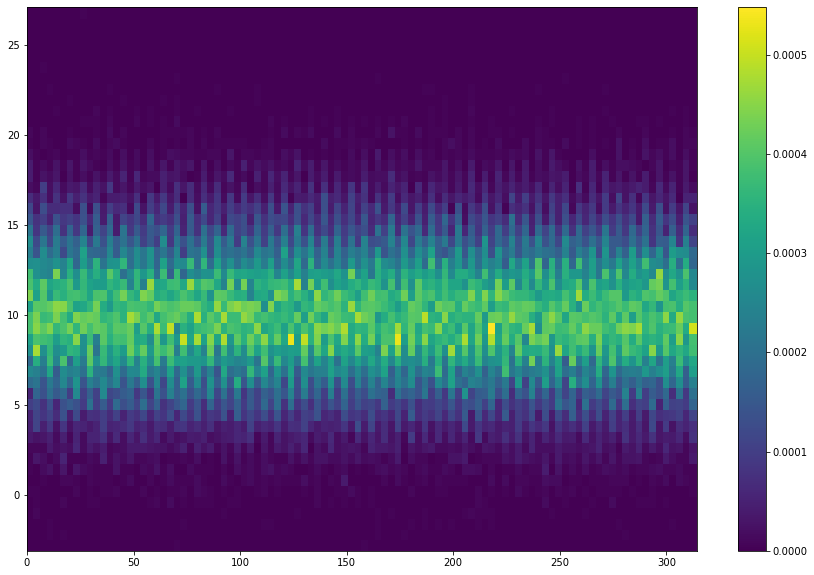

In [67]:
plt.hist2d(t,bkgd,bins = [100,50], density=True)
plt.colorbar()
plt.show()

##### 2b) Clearly explain what is being plotted in your plot (e.g. what does each color mean?)
The plot above shows the density of our data. In the plot we split up our x axis into 100 bins and our y axis into 50 bins, then colorize each bin based on how many points it contains. The more yellow a bin is, the larger the number of points it contains. This shows us that our distribution has a large number of values in around Y=10, and that the further you get in either direction, the fewer values there are. It also shows that the distribution is equally likely to produce a value above Y=10 as it is to produce a value below Y=10. Finally, we also notice that the distribution seems to periodically pulse and contract.

### Problem 3: Folding
Now if you have a periodic signal, it is possible to fold the data stream at that period to make the pattern clearer.

##### 3a) Make an new time variable that folds at a period of  2π  (the modulo operator is your friend, variably expressed as mod(), %, or rem()). Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never actually want to plot all the points.)

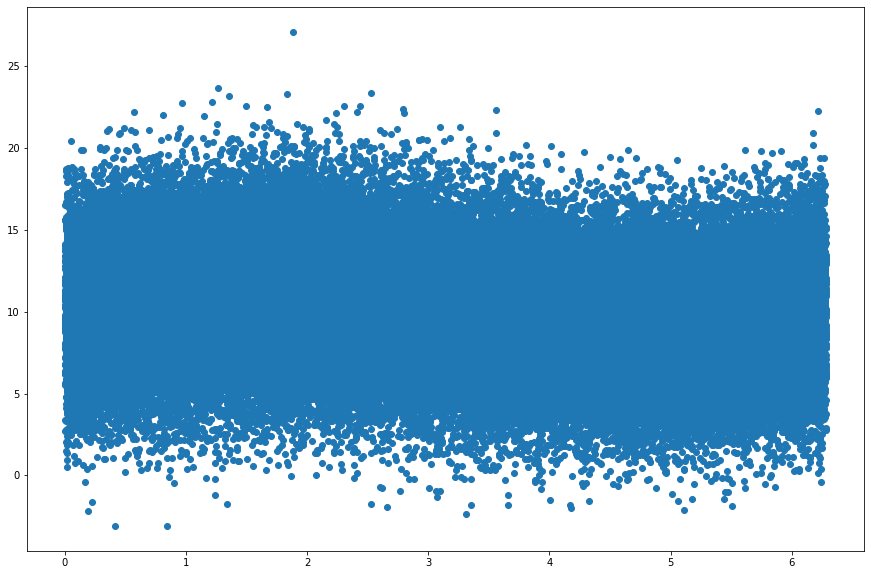

In [69]:
newT = t%(2*np.pi)
plt.plot(newT,bkgd,'o')

##### 3b) Make a 2d histogram plot of your folded data

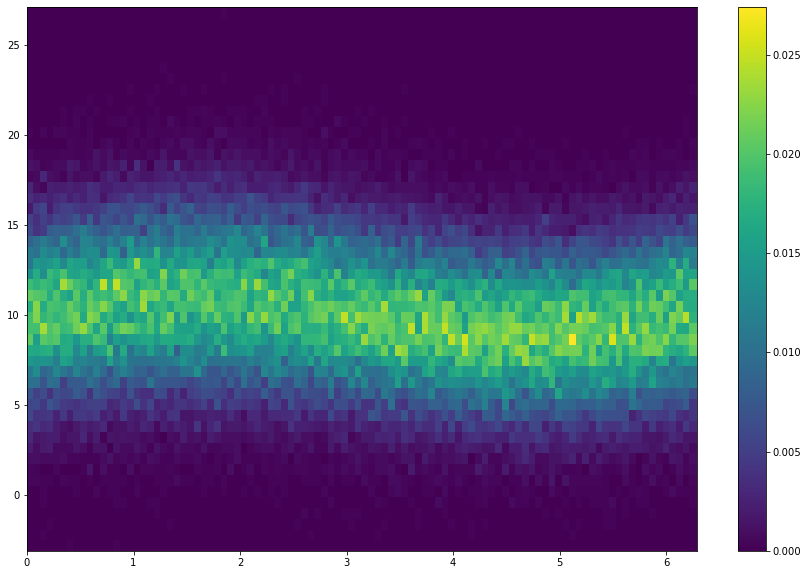

In [74]:
folded = plt.hist2d(newT,bkgd,bins=[100,50],density=True)
plt.colorbar()
plt.show()

##### 3c) Calculate the average as a function of the folded variable, then overplot this on 3b to show the average as a function of folded time.

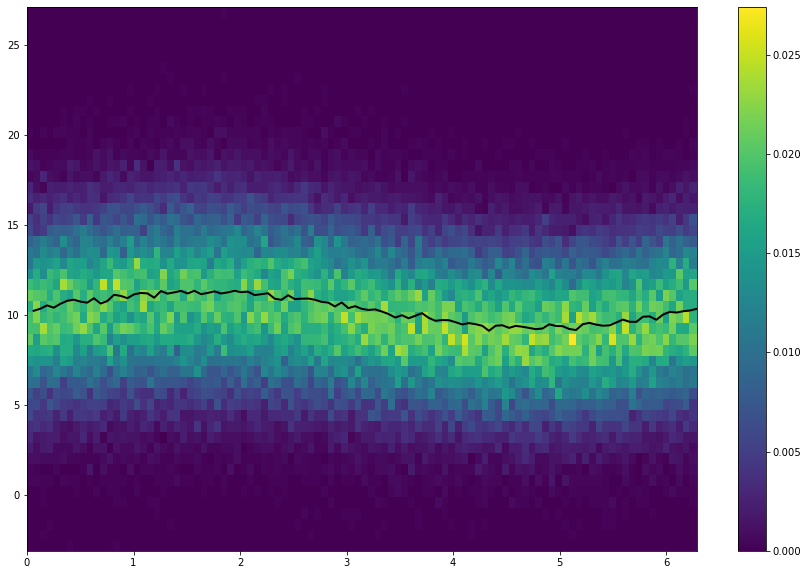

In [76]:
mean = np.zeros(100)
for i in range(0,100):
    mean[i] = sum(folded[2][1:]*folded[0][i,:]/sum(folded[0][i,:]))

plt.hist2d(newT,bkgd,bins=[100,50],density=True)
plt.plot(folded[1][1:],mean, linewidth=2,color='black')
plt.colorbar()
plt.show()